Adding the image folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Adding the currunt path of image folder

In [ ]:
import os
os.chdir('/content/drive/My Drive/CS408 - Computer vision/pokemon_jpg')


import libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


read and display images

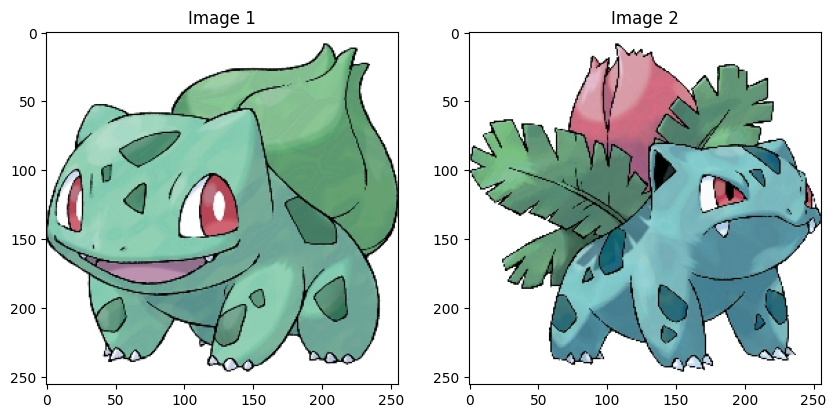

In [ ]:
# Load images
image1 = cv2.imread('1.jpg')  # Replace with your actual image names
image2 = cv2.imread('2.jpg')

# Convert images to RGB (OpenCV loads images in BGR)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.show()


DATA SET LINK - https://www.kaggle.com/datasets/kvpratama/pokemon-images-dataset

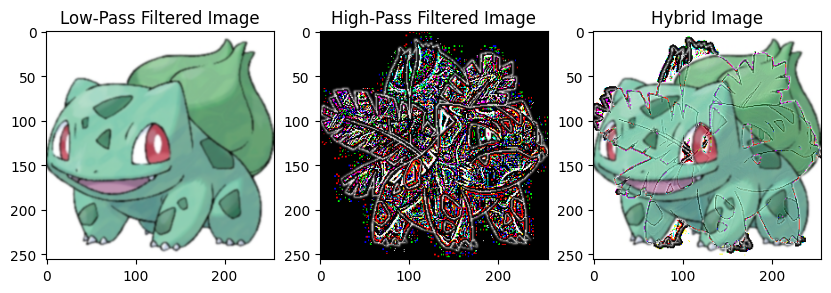

In [ ]:
# Apply low-pass filter to the first image
low_pass_image = cv2.GaussianBlur(image1, (15, 15), 1)

# Apply high-pass filter to the second image
high_pass_image = image2 - cv2.GaussianBlur(image2, (51, 51), 1)

# Combine the images
hybrid_image = low_pass_image + high_pass_image

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(low_pass_image)
plt.title('Low-Pass Filtered Image')
plt.subplot(1, 3, 2)
plt.imshow(high_pass_image)
plt.title('High-Pass Filtered Image')
plt.subplot(1, 3, 3)
plt.imshow(hybrid_image)
plt.title('Hybrid Image')
plt.show()


IN a another way - fourior transofromation

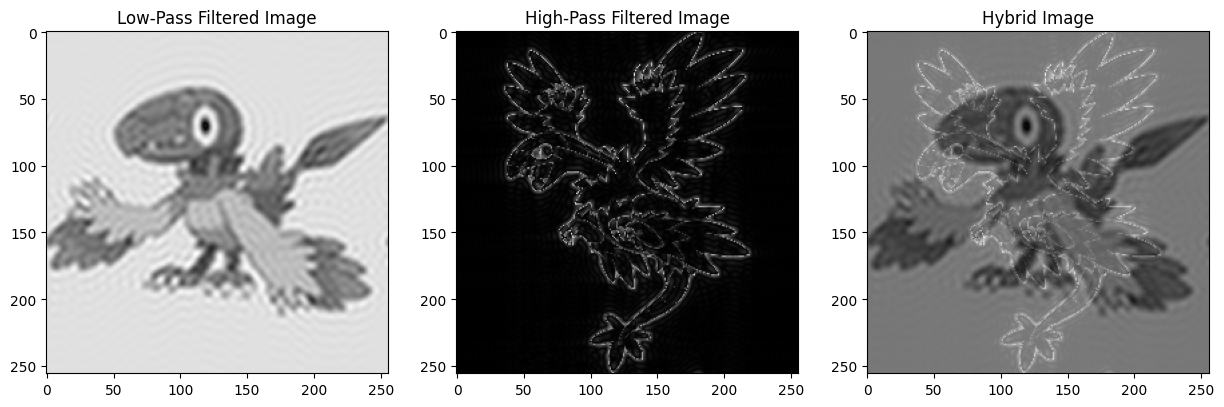

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load images
image3 = cv2.imread('566.jpg')  # Replace with your actual image names
image4 = cv2.imread('567.jpg')

# Convert images to RGB (OpenCV loads images in BGR)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Convert images to grayscale
gray_image3 = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)
gray_image4 = cv2.cvtColor(image4, cv2.COLOR_RGB2GRAY)

# Function to apply low-pass filter using Fourier Transform
def apply_low_pass_filter(image, size):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-size:crow+size, ccol-size:ccol+size] = 1

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return img_back

# Function to apply high-pass filter using Fourier Transform
def apply_high_pass_filter(image, size):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.ones((rows, cols, 2), np.uint8)
    mask[crow-size:crow+size, ccol-size:ccol+size] = 0

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return img_back

# Apply low-pass filter to the first image
low_pass_image = apply_low_pass_filter(gray_image3, 30)

# Apply high-pass filter to the second image
high_pass_image = apply_high_pass_filter(gray_image4, 30)

# Normalize the images to the range [0, 255] for display
low_pass_image = cv2.normalize(low_pass_image, None, 0, 255, cv2.NORM_MINMAX)
high_pass_image = cv2.normalize(high_pass_image, None, 0, 255, cv2.NORM_MINMAX)

# Combine the images
hybrid_image = cv2.addWeighted(low_pass_image, 0.5, high_pass_image, 0.5, 0)

# Display the result
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(low_pass_image, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.subplot(1, 3, 2)
plt.imshow(high_pass_image, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.subplot(1, 3, 3)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image')
plt.show()


Another way with color

Still one is color and other one is black

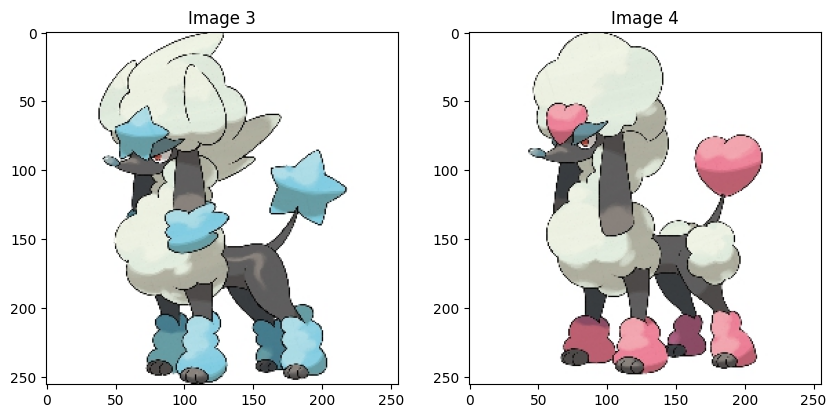

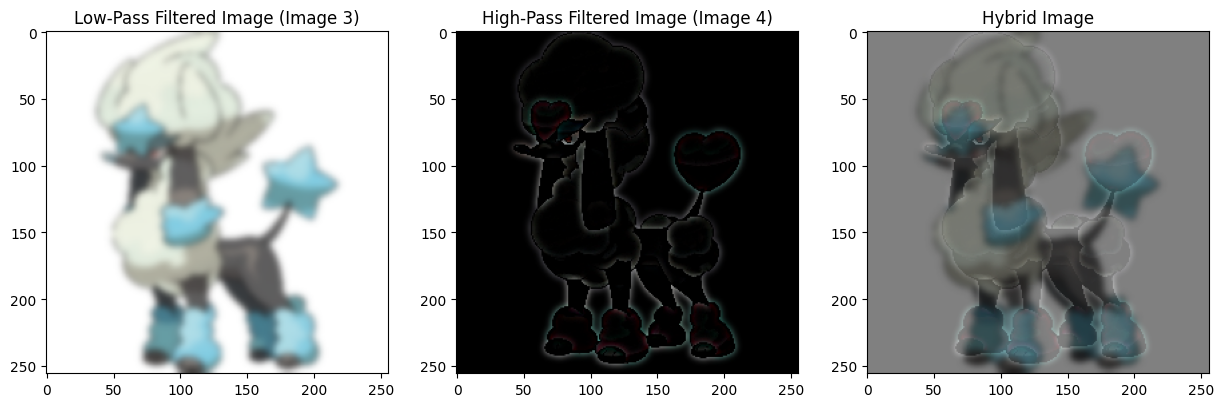

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load images
image3 = cv2.imread('676-star.jpg')  # Replace with your actual image names
image4 = cv2.imread('676-heart.jpg')

# Convert images to RGB (OpenCV loads images in BGR)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image3)
plt.title('Image 3')
plt.subplot(1, 2, 2)
plt.imshow(image4)
plt.title('Image 4')
plt.show()

# Function to apply low-pass filter using Gaussian Blur
def apply_low_pass_filter(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Function to apply high-pass filter by subtracting low-pass filtered image
def apply_high_pass_filter(image, kernel_size):
    low_pass = apply_low_pass_filter(image, kernel_size)
    return cv2.subtract(image, low_pass)

# Parameters
kernel_size = 15  # Adjust as needed

# Apply low-pass filter to image3
low_pass_image = apply_low_pass_filter(image3, kernel_size)

# Apply high-pass filter to image4
high_pass_image = apply_high_pass_filter(image4, kernel_size)

# Combine images
hybrid_image = cv2.addWeighted(low_pass_image, 0.5, high_pass_image, 0.5, 0)

# Display the result
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(low_pass_image)
plt.title('Low-Pass Filtered Image (Image 3)')
plt.subplot(1, 3, 2)
plt.imshow(high_pass_image)
plt.title('High-Pass Filtered Image (Image 4)')
plt.subplot(1, 3, 3)
plt.imshow(hybrid_image)
plt.title('Hybrid Image')
plt.show()


Another way tring to protect color

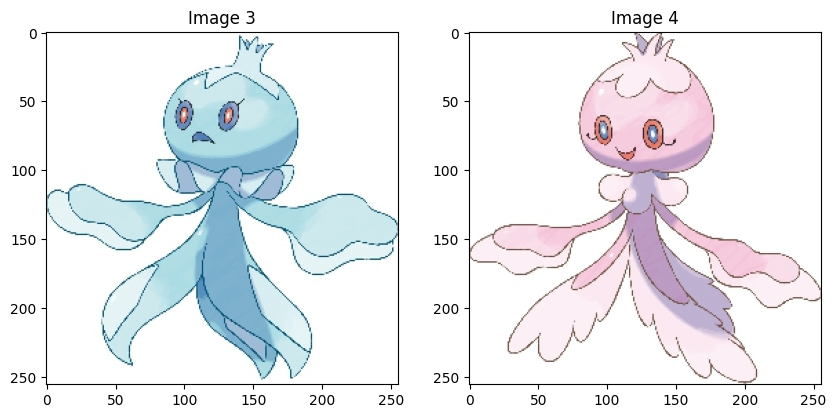

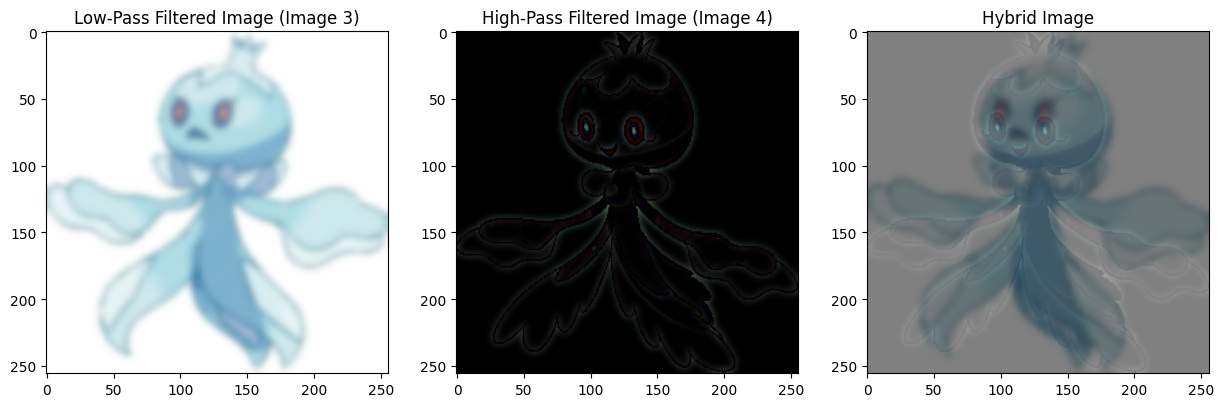

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load images
image3 = cv2.imread('592.jpg')  # Replace with your actual image names
image4 = cv2.imread('592f.jpg')

# Convert images to RGB (OpenCV loads images in BGR)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image3)
plt.title('Image 3')
plt.subplot(1, 2, 2)
plt.imshow(image4)
plt.title('Image 4')
plt.show()

# Function to apply low-pass filter using Gaussian Blur
def apply_low_pass_filter(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Function to apply high-pass filter by subtracting low-pass filtered image
def apply_high_pass_filter(image, kernel_size):
    low_pass = apply_low_pass_filter(image, kernel_size)
    return cv2.subtract(image, low_pass)

# Parameters
kernel_size = 15  # Adjust as needed

# Apply low-pass filter to image3
low_pass_image = apply_low_pass_filter(image3, kernel_size)

# Apply high-pass filter to image4
high_pass_image = apply_high_pass_filter(image4, kernel_size)

# Combine images
hybrid_image = cv2.addWeighted(low_pass_image, 0.5, high_pass_image, 0.5, 0)

# Display the result
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(low_pass_image)
plt.title('Low-Pass Filtered Image (Image 3)')
plt.subplot(1, 3, 2)
plt.imshow(high_pass_image)
plt.title('High-Pass Filtered Image (Image 4)')
plt.subplot(1, 3, 3)
plt.imshow(hybrid_image)
plt.title('Hybrid Image')
plt.show()


Another way possible ------------------------------------------------------   this is also used the fourior with cutoff

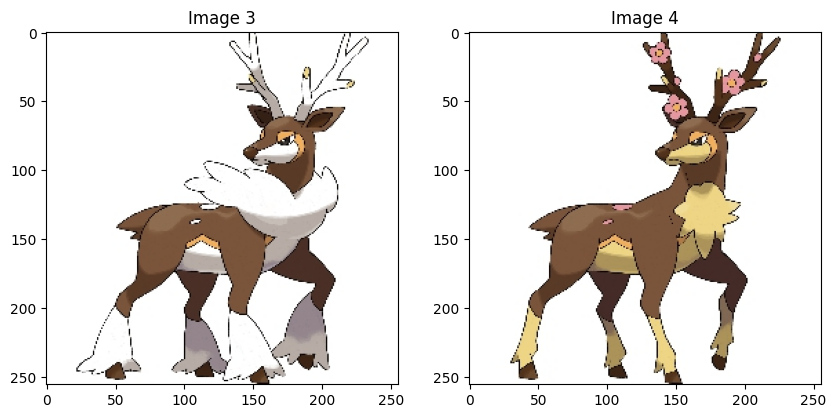

In [ ]:
# Load images
image3 = cv2.imread('586-winter.jpg')  # Replace with your actual image names
image4 = cv2.imread('586-spring.jpg')

# Convert images to RGB (OpenCV loads images in BGR)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image3)
plt.title('Image 3')
plt.subplot(1, 2, 2)
plt.imshow(image4)
plt.title('Image 4')
plt.show()


By gpt -3  

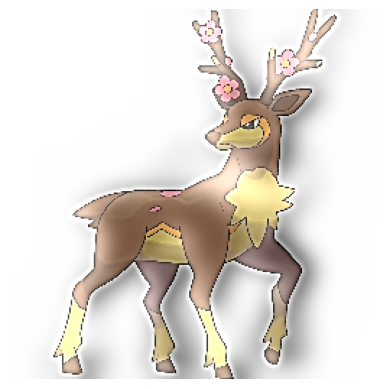

In [ ]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

def apply_gaussian_blur(image, sigma):
    return gaussian_filter(image, sigma=sigma)

def hybrid_image(img1, img2, low_freq_sigma, high_freq_sigma):
    # Ensure both images are the same size
    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

    # Convert images to float and normalize
    img1 = img1.astype(float) / 255.0
    img2 = img2.astype(float) / 255.0

    # Apply Gaussian blur (low-pass filter) to the first image
    low_freq_img1 = apply_gaussian_blur(img1, low_freq_sigma)

    # Apply Gaussian blur (high-pass filter) to the second image
    high_freq_img2 = img2 - apply_gaussian_blur(img2, high_freq_sigma)

    # Combine the low-frequency and high-frequency images
    hybrid_img = low_freq_img1 + high_freq_img2

    # Clip the values to [0, 1] and convert back to 8-bit
    hybrid_img = np.clip(hybrid_img * 255.0, 0, 255).astype(np.uint8)

    return hybrid_img

# Load images
img1 = cv2.imread('586-winter.jpg')
img2 = cv2.imread('586-spring.jpg')

# Create hybrid image
hybrid = hybrid_image(img1, img2, low_freq_sigma=8, high_freq_sigma=2)

# Save and display the result
cv2.imwrite('hybrid_image.jpg', hybrid)

# Display the hybrid image using matplotlib
plt.imshow(cv2.cvtColor(hybrid, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()


Try for a another image

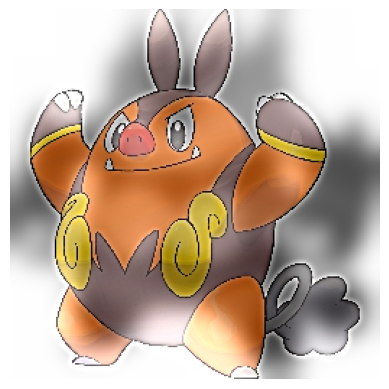

In [ ]:
# Load new images
img1 = cv2.imread('500.jpg')
img2 = cv2.imread('499.jpg')

# Create hybrid image
hybrid = hybrid_image(img1, img2, low_freq_sigma=8, high_freq_sigma=2)

# Save and display the result
cv2.imwrite('hybrid_image_new.jpg', hybrid)

# Display the hybrid image using matplotlib
plt.imshow(cv2.cvtColor(hybrid, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis
plt.show()